In [16]:
import re
import nltk
import os
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.datasets import  load_files
from nltk.corpus import stopwords
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.pipeline import Pipeline

In [17]:
data = pd.read_csv(r'data/spambase.data', names=[x for x in range(58)])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [18]:
data = data.fillna(data.mean())

In [19]:
X = data.iloc[:,:57]
y = data[57]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape, X_test.shape

((3220, 57), (1381, 57))

# GaussianNaiveBayes

In [23]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8139


In [25]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8186
Test set score: 0.8139


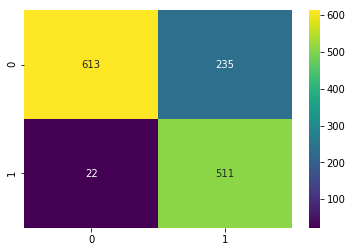

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       848
           1       0.68      0.96      0.80       533

    accuracy                           0.81      1381
   macro avg       0.83      0.84      0.81      1381
weighted avg       0.86      0.81      0.82      1381



In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred))

# kNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
steps = [
    ('model', KNeighborsClassifier())
]
knn_pipe = Pipeline(steps)

In [28]:
grid_params = { 'model__algorithm' : ['brute'],
               'model__leaf_size' : [30,50,70,90,110],
               'model__metric' : ['minkowski'],
               'model__p' : [1],
               'model__n_neighbors' : [3,5,10,19],
               'model__weights' : ['uniform', 'distance'],
               'model__n_jobs' : [-1]
}
classifier_knn = GridSearchCV(knn_pipe, grid_params, cv = 3)
classifier_knn = classifier_knn.fit(X_train, y_train.ravel())

In [29]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training set: ", accuracy_knn_train)
y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Test set: ", accuracy_knn_test)
print('The grid_params: ')
print(classifier_knn.best_params_)

Training set:  0.9990683229813665
Test set:  0.9268645908761767
The grid_params: 
{'model__algorithm': 'brute', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__n_jobs': -1, 'model__n_neighbors': 19, 'model__p': 1, 'model__weights': 'distance'}


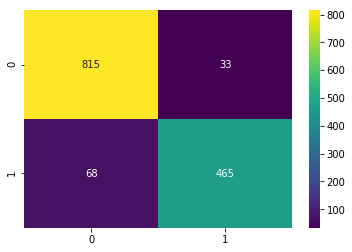

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       848
           1       0.93      0.87      0.90       533

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()
print(classification_report(y_test, y_pred_knn_test))